In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [17]:
df = pd.read_csv(r"C:\Users\aujal\OneDrive\Desktop\practicals\AI\AI TYCS\disease.csv")

In [18]:
df.head(11)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [19]:
df.tail(15)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
334,Prostate Cancer,Yes,Yes,No,No,70,Male,High,Normal,Negative
335,Schizophrenia,No,Yes,Yes,No,70,Male,Normal,Normal,Negative
336,Gout,Yes,No,Yes,No,70,Female,Normal,High,Positive
337,Migraine,No,No,Yes,No,70,Female,Normal,Normal,Positive
338,Stroke,No,Yes,No,No,70,Male,Normal,High,Positive
339,Stroke,No,Yes,No,No,70,Male,Normal,High,Positive
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Disease']=le.fit_transform(df['Disease'])
df['Fever']=le.fit_transform(df['Fever'])
df['Cough']=le.fit_transform(df['Cough'])
df['Fatigue']=le.fit_transform(df['Fatigue'])
df['Difficulty Breathing']=le.fit_transform(df['Difficulty Breathing'])
df['Gender']=le.fit_transform(df['Gender'])
df['Age']=le.fit_transform(df['Age'])
df['Blood Pressure']=le.fit_transform(df['Blood Pressure'])
df['Cholesterol Level']=le.fit_transform(df['Cholesterol Level'])
df['Outcome Variable']=le.fit_transform(df['Outcome Variable'])

In [55]:
df.head(11)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Outcome variable
0,56,1,0,1,1,0,0,1,2,1,1
1,24,0,1,1,0,1,0,2,2,0,0
2,37,0,1,1,0,1,0,2,2,0,0
3,6,1,1,0,1,1,1,2,2,1,1
4,6,1,1,0,1,1,1,2,2,1,1
5,37,1,0,0,0,1,0,2,2,1,1
6,56,1,1,1,1,1,0,2,2,1,1
7,56,1,1,1,1,1,0,2,2,1,1
8,53,0,1,0,0,2,0,2,2,0,0
9,53,0,1,0,0,2,0,2,2,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Disease               349 non-null    int64
 1   Fever                 349 non-null    int64
 2   Cough                 349 non-null    int64
 3   Fatigue               349 non-null    int64
 4   Difficulty Breathing  349 non-null    int64
 5   Age                   349 non-null    int64
 6   Gender                349 non-null    int64
 7   Blood Pressure        349 non-null    int64
 8   Cholesterol Level     349 non-null    int64
 9   Outcome Variable      349 non-null    int64
 10  Outcome variable      349 non-null    int64
dtypes: int64(11)
memory usage: 30.1 KB


In [57]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Outcome variable
0,56,1,0,1,1,0,0,1,2,1,1
1,24,0,1,1,0,1,0,2,2,0,0
2,37,0,1,1,0,1,0,2,2,0,0
3,6,1,1,0,1,1,1,2,2,1,1
4,6,1,1,0,1,1,1,2,2,1,1


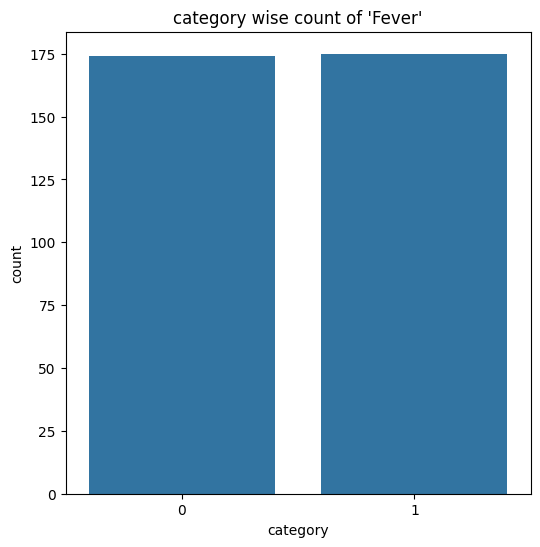

In [58]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Fever'],data=df)
plt.title("category wise count of 'Fever'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

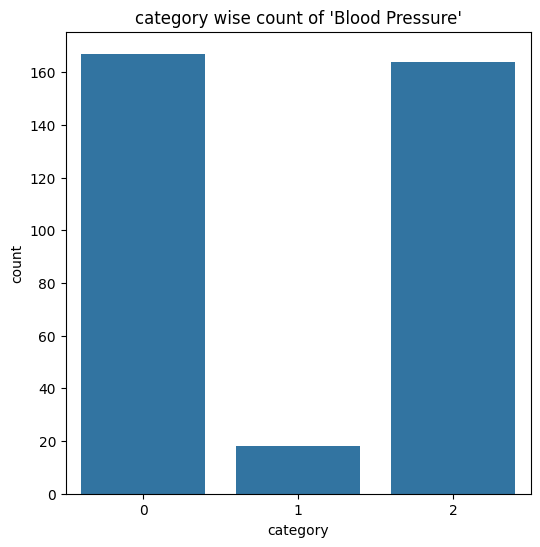

In [50]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Blood Pressure'],data=df)
plt.title("category wise count of 'Blood Pressure'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

In [59]:
X=df.drop('Disease',axis=1)
y=df['Disease']

In [60]:
#Training Algorithm
classifier = MultinomialNB()
classifier.fit(X,y)

MultinomialNB()

In [63]:
#Training Algorithm
classfier= CategoricalNB()
classifier.fit(X,y)

MultinomialNB()

In [64]:
#Training Algorithm
classfier= GaussianNB()
classifier.fit(X,y)

MultinomialNB()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,recall_score, f1_score

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [69]:
classfier= MultinomialNB()
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

#calculate the confusion matrix and metrics
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Accuracy \n", accuracy_score(y_test,y_pred))

#use average='macro' or 'weighted' for multiclass
print("Precision \n", precision_score(y_test,y_pred, average='macro'))
print("Recall \n", recall_score(y_test,y_pred, average='macro'))
print("F1 Score \n", f1_score(y_test,y_pred, average='macro'))

#classification report
print("Classification report:]n \n", classification_report(y_test,y_pred))


Confusion Matrix 
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 
 0.14285714285714285
Precision 
 0.019305861253770276
Recall 
 0.057446808510638304
F1 Score 
 0.025535999253145685
Classification report:]n 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.44      0.50      0.47         8
           9       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
     

c:\Users\aujal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aujal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aujal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 